In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# reading the database

data_domestic = pd.read_csv('/Users/Sean/Desktop/per_capita_co2_domestic_aviation.csv')


# printing the top 10 rows of the CSV

display(data_domestic.head(10))

,Entity,Code,Year,Per_capita_domestic_aviation_CO2
0,Afghanistan,AFG,2018,1.488983
1,Algeria,DZA,2018,4.426575
2,Angola,AGO,2018,2.212520
3,Argentina,ARG,2018,34.833742
4,Australia,AUS,2018,267.167242
5,Austria,AUT,2018,3.690323
6,Azerbaijan,AZE,2018,0.275294
7,Bahrain,BHR,2018,0.000000
8,Bangladesh,BGD,2018,0.923364
9,Belarus,BLR,2018,0.000000


In [49]:
# reading the database

data_international = pd.read_csv('/Users/Sean/Desktop/per_capita_co2_international_aviation.csv')


# printing the top 10 rows of the CSV

display(data_international.head(10))

,Entity,Code,Year,Per_capita_international_aviation_CO2
0,Afghanistan,AFG,2018,3.524352
1,Algeria,DZA,2018,19.427454
2,Angola,AGO,2018,12.851503
3,Argentina,ARG,2018,59.681670
4,Australia,AUS,2018,495.948006
5,Austria,AUT,2018,248.640596
6,Azerbaijan,AZE,2018,39.778095
7,Bahrain,BHR,2018,483.100678
8,Bangladesh,BGD,2018,6.920816
9,Belarus,BLR,2018,27.058226


In [50]:
print(data_international.shape)    # check shape number of row and columns
print(data_international.dtypes)   # date is an object

(106, 4)
Entity                                    object
Code                                      object
Year                                       int64
Per_capita_international_aviation_CO2    float64
dtype: object


In [51]:
print(data_domestic.head())   # view top lines of data

        Entity Code  Year  Per_capita_domestic_aviation_CO2
0  Afghanistan  AFG  2018                          1.488983
1      Algeria  DZA  2018                          4.426575
2       Angola  AGO  2018                          2.212520
3    Argentina  ARG  2018                         34.833742
4    Australia  AUS  2018                        267.167242


In [52]:
print(data_domestic.shape)    # check shape number of row and columns

(106, 4)


In [53]:
print(data_domestic.dtypes)   # check data types

Entity                               object
Code                                 object
Year                                  int64
Per_capita_domestic_aviation_CO2    float64
dtype: object


In [54]:

data_international = pd.read_csv('/Users/Sean/Desktop/per_capita_co2_international_aviation.csv')

# this drops the unneeded columns
selected_cols = ['Entity', 'Code', 'Per_capita_international_aviation_CO2']
df_updated_international = data_international.loc[:, selected_cols] # using the .loc function

In [55]:
print(df_updated_international)

            Entity      Code  Per_capita_international_aviation_CO2
0      Afghanistan       AFG                               3.524352
1          Algeria       DZA                              19.427454
2           Angola       AGO                              12.851503
3        Argentina       ARG                              59.681670
4        Australia       AUS                             495.948006
..             ...       ...                                    ...
101  United_States       USA                             170.601004
102     Uzbekistan       UZB                              15.186509
103      Venezuela       VEN                              10.858139
104        Vietnam       VNM                              33.551330
105          World  OWID_WRL                              58.136314

[106 rows x 3 columns]


In [56]:
#same process for domestic dataset
data_domestic = pd.read_csv('/Users/Sean/Desktop/per_capita_co2_domestic_aviation.csv')
selected_cols = ['Entity', 'Code', 'Per_capita_domestic_aviation_CO2']
df_updated_domestic = data_domestic.loc[:, selected_cols] # using the .loc function

print(df_updated_domestic)

            Entity      Code  Per_capita_domestic_aviation_CO2
0      Afghanistan       AFG                          1.488983
1          Algeria       DZA                          4.426575
2           Angola       AGO                          2.212520
3        Argentina       ARG                         34.833742
4        Australia       AUS                        267.167242
..             ...       ...                               ...
101  United_States       USA                        385.520397
102     Uzbekistan       UZB                          1.670979
103      Venezuela       VEN                          4.189344
104        Vietnam       VNM                         23.589884
105          World  OWID_WRL                         39.726296

[106 rows x 3 columns]


In [57]:
#both lists are made up of the same list of countries, as we can see 106 columns each. 
#If we sort in descending order we can get an idea of what our visualisations should look like for each dataframe

In [58]:
df_updated_domestic.sort_values(by=['Per_capita_domestic_aviation_CO2'], inplace=True, ascending=False)
print(df_updated_domestic)
# now we can see the 5 largest values for the domestic dataset

            Entity Code  Per_capita_domestic_aviation_CO2
101  United_States  USA                        385.520397
4        Australia  AUS                        267.167242
69          Norway  NOR                        209.230182
67     New_Zealand  NZL                        174.188537
16          Canada  CAN                        168.267380
..             ...  ...                               ...
78           Qatar  QAT                          0.000000
49          Kuwait  KWT                          0.000000
52         Lebanon  LBN                          0.000000
54      Luxembourg  LUX                          0.000000
28     El_Salvador  SLV                          0.000000

[106 rows x 3 columns]


In [59]:
# Now I will Merge both datasets

df_merged = pd.merge(df_updated_domestic, df_updated_international, on = "Entity", how = "outer")
display(df_merged.head(10))

,Entity,Code_x,Per_capita_domestic_aviation_CO2,Code_y,Per_capita_international_aviation_CO2
0,United_States,USA,385.520397,USA,170.601004
1,Australia,AUS,267.167242,AUS,495.948006
2,Norway,NOR,209.230182,NOR,298.030303
3,New_Zealand,NZL,174.188537,NZL,640.278593
4,Canada,CAN,168.267380,CAN,294.512443
5,Japan,JPN,73.958502,JPN,110.185613
6,Iceland,ISL,71.323861,ISL,3505.599607
7,Chile,CHL,70.458354,CHL,97.698262
8,France,FRA,69.666608,FRA,224.923684
9,Saudi_Arabia,SAU,65.243270,SAU,169.359591


In [60]:
# Now I can see I have carried the 'code_y' column into the new dataframe but it will not be required
# Therefor I will remove this column

In [61]:
selected_cols = ['Entity', 'Code_x', 'Per_capita_domestic_aviation_CO2', 'Per_capita_international_aviation_CO2']
df_merged = df_merged.loc[:, selected_cols] # using the .loc function

display(df_merged.head(10))

,Entity,Code_x,Per_capita_domestic_aviation_CO2,Per_capita_international_aviation_CO2
0,United_States,USA,385.520397,170.601004
1,Australia,AUS,267.167242,495.948006
2,Norway,NOR,209.230182,298.030303
3,New_Zealand,NZL,174.188537,640.278593
4,Canada,CAN,168.267380,294.512443
5,Japan,JPN,73.958502,110.185613
6,Iceland,ISL,71.323861,3505.599607
7,Chile,CHL,70.458354,97.698262
8,France,FRA,69.666608,224.923684
9,Saudi_Arabia,SAU,65.243270,169.359591


In [62]:
# next we will try some visualisations
# First we will use Matplotlib and we will name it plt as seen below



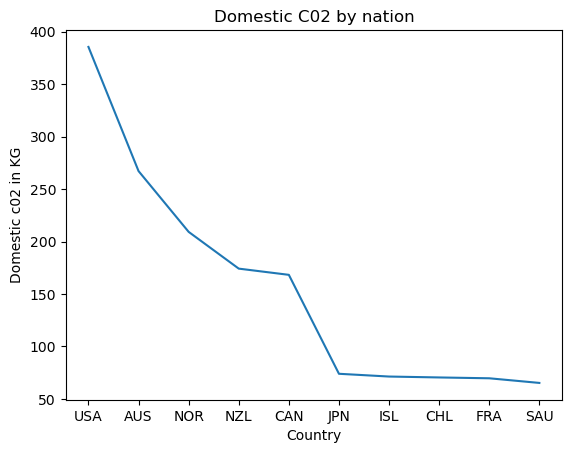

In [63]:
# To get a quick visualisation of a section of the dataframe I will create lists and use plt.plot
# this graph will show the 10 highest values for domestic emmisions

Country = [ 'USA', 'AUS', 'NOR', 'NZL', 'CAN', 'JPN', 'ISL', 'CHL', 'FRA', 'SAU' ]
Domestic_c02 = [ 385.520397, 267.167242, 209.230182, 174.188537, 168.267380, 73.958502, 71.323861, 70.458354, 
               69.666608, 65.243270 ]

plt.plot(Country, Domestic_c02)


plt.title('Domestic C02 by nation')


plt.xlabel('Country')


plt.ylabel('Domestic c02 in KG')


plt.show()



In [64]:
# Now I will try a similiar visualisation for the same nations international
# first I will need to sort by descending order for this column

df_merged.sort_values(by=['Per_capita_international_aviation_CO2'], inplace=True, ascending=False)
display(df_merged.head(10))


,Entity,Code_x,Per_capita_domestic_aviation_CO2,Per_capita_international_aviation_CO2
6,Iceland,ISL,71.323861,3505.599607
101,Qatar,QAT,0.000000,2472.695468
88,United_Arab_Emirates,ARE,0.137823,2195.111739
99,Singapore,SGP,0.000000,1741.036404
98,Malta,MLT,0.000000,991.639201
3,New_Zealand,NZL,174.188537,640.278593
46,Mauritius,MUS,8.748152,599.817907
79,Ireland,IRL,1.009062,574.126181
56,Switzerland,CHE,3.914777,513.284541
1,Australia,AUS,267.167242,495.948006


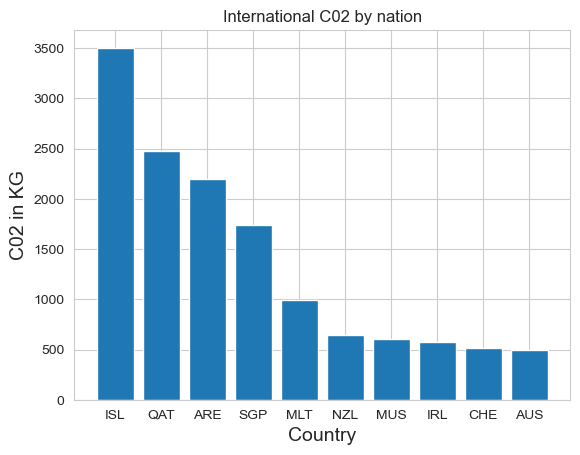

In [78]:
Country = [ 'ISL', 'QAT', 'ARE', 'SGP', 'MLT', 'NZL', 'MUS', 'IRL', 'CHE', 'AUS' ]
International_c02 = [ 3505.599607, 2472.695468, 2195.111739, 1741.036404, 991.639201, 640.278593, 599.817907, 574.126181, 
               513.284541, 495.948006 ]

plt.bar(Country, International_c02)


plt.title('International C02 by nation')


plt.xlabel('Country', fontsize=14)


plt.ylabel('C02 in KG', fontsize=14)


plt.show()
